In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import svm

In [2]:
whiteWine = pd.read_csv('/Users/vincenzo/Desktop/Repos/tts-ds-fundamentals-course-main/datascience/python/tts-datascience-ml-wine-analysis/wine_red_white/winequality-red.csv', sep = ';')
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Cleaning the data
whiteWine.drop_duplicates(inplace=True)
whiteWine.drop_duplicates(inplace=True)
#Checks to male sure no leftover non applicable terms in the data sets
print('NAs in White Wine:', whiteWine.isna().any().any(),'\n')

NAs in White Wine: False 



### White Wine Characteristics Correlation

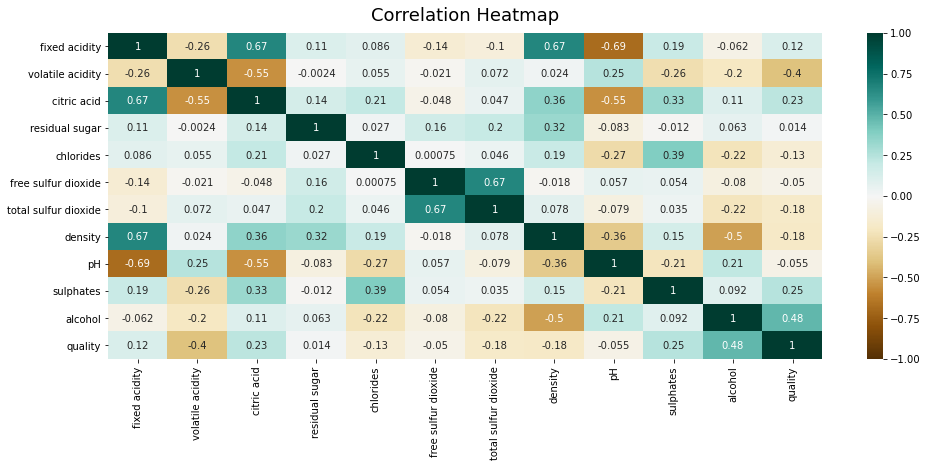

In [6]:
plt.figure(figsize = (16,6))
heatmap = sns.heatmap(whiteWine.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12);
plt.savefig('heatmap.png', dpi = 300, bbox_inches = 'tight')

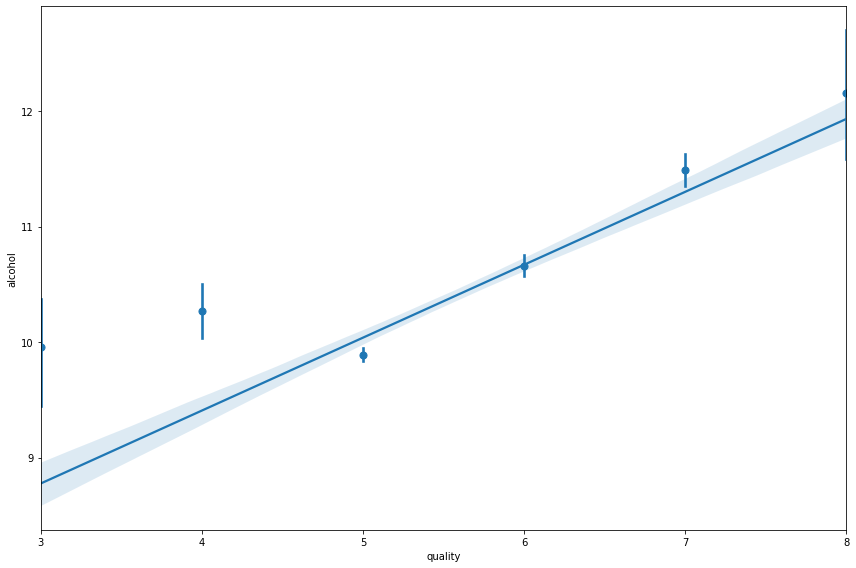

In [7]:
fig, axes = plt.subplots(1)
sns.regplot(x = 'quality', y = 'alcohol', data = whiteWine, x_estimator = np.mean)
fig.set_figheight(8)
fig.set_figwidth(12)
plt.tight_layout(w_pad = 10)

In [8]:
# Correlation with output variable
cor = whiteWine.corr()
cor_target = abs(cor['quality'])

# Select highly correlated characteristics
relevant_characteristics = cor_target[cor_target > 0.45]
relevant_characteristics

alcohol    0.480343
quality    1.000000
Name: quality, dtype: float64

In [9]:
# bin the quality data into 3 separate characteristics
rating_scale = ['bad', 'good', 'great']
categories = pd.cut(whiteWine['quality'], bins = [2, 4, 6, 8], labels = rating_scale)
whiteWine['quality'] = categories

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [11]:
# pre-processing step: split the data into x and y
x = whiteWine.loc[:, ['alcohol']]
y = whiteWine.loc[:, ['quality']]

In [15]:
# Encode out the target: Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(y)

In [16]:
# split data set into train and test -- test 20% of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
# Standardize the data
from sklearn.preprocessing import StandardScaler 
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [18]:
# Use the poly kernel of SVM to classify the data
from sklearn.svm import SVC
CL = SVC(kernel = 'poly', degree = 2)
CL.fit(x_train, y_train)
y_pred = CL.predict(x_test)

[Text(0, 0.5, 'bad'), Text(0, 1.5, 'good'), Text(0, 2.5, 'great')]

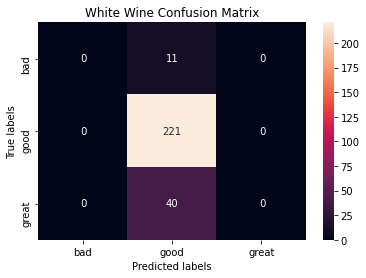

In [19]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '2.0f')
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
ax.set_title('White Wine Confusion Matrix')
ax.xaxis.set_ticklabels(['bad', 'good', 'great']); ax.yaxis.set_ticklabels(['bad', 'good', 'great'])

In [22]:
# Cross validation to assess the effectiveness of the model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = CL, X = x_train,
                            y = y_train, cv = 10)
# model accuracy
accuracies.mean()

0.8196992864424058